In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

1. 데이터 확인

In [2]:
#MNIST dataset

train_dset = datasets.MNIST('../data', train=True, download=True,transform=transforms.ToTensor())

test_dset = datasets.MNIST('../data', train=False,transform=transforms.ToTensor(), download=True)

print('number of training data: ', len(train_dset))
print('number of test data ', len(test_dset))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

number of training data:  60000
number of test data  10000


In [3]:
train_dset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Image
Shape of image	:  torch.Size([1, 28, 28])
10'th row of this image	: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.2000, 0.9333, 0.9922, 0.9922, 0.7451, 0.4471, 0.9922, 0.8941,
        0.1843, 0.3098, 1.0000, 0.6588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
Label
label:  0


<function matplotlib.pyplot.show(*args, **kw)>

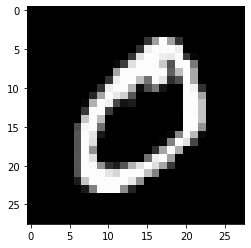

In [4]:
#데이터 확인

"""

TODO: train_dset[*] 의 숫자값을 바꾸어 데이터를 다른 걸 출력해보자.

"""
image, label = train_dset[1] #image 해당값과 label 숫자 5가 나타남 

print('Image')
print('=========================================')
print('Shape of image\t: ', image.shape)
print('10\'th row of this image\t:', image[0][9])

print('Label')
print('=========================================')
print('label: ', label)

from matplotlib import pyplot as plt
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.show

In [ ]:
image.squeeze().numpy() # squeeze는 차원을 1차원 줄여주는 역할 수행 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

2. Training and Test

In [5]:
"""
TODO: batch_size 를 바꾸어보자 #batch_size가 의히마흔 바는 몇개를 불러올건지, 
"""
train_loader = torch.utils.data.DataLoader(train_dset, batch_size = 16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dset, batch_size = 16, shuffle=False)

In [6]:
#Training
def train(model, train_loader, optimizer, i_epoch, device):
    model.train()
    for i, (image, target) in enumerate(train_loader):
        image = image.to(device)
        output = model(image)
        loss = F.cross_entropy(output, target)

        model.zero_grad()
        loss.backward()
        optimizer.step()


         #러닝 커브 그리기
        loss_value.append(loss.detach().numpy())

        #100번쨰 마다 loss 출력
        if i%100==0:
            print("epoch: {}, iteration: {}, loss: {}".format(i_epoch, i, loss.item()))

In [7]:
#Test
def test(model, test_loader, i_epoch, device):
    model.eval()
    accurate = 0
    test_loss = 0

    with torch.no_grad():
        for i, (image, target) in enumerate(test_loader):
            image = image.to(device)
            output = model(image)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            prediction = torch.argmax(output, dim=1)
            accurate += prediction.eq(target.view_as(prediction)).sum().item()


    accuracy = accurate / len(test_loader.dataset)
    #러닝커브 그리기
    accuracy_value.append(accuracy)
    print("epoch: {}, accuracy: {}".format(i_epoch, accuracy))


3. Model

In [8]:
"""
TODO: 모델 Customization! 레이어 개수나 레이어 차원, 활성화 함수를 바꾸어보자.

데이터의 형태를 주의하면서 바꾸어 볼 것~

"""

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.fc = nn.Sequential(
            nn.Linear(28 * 28, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Tanh()
           )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        return self.fc(x)

4. Evaluation

In [9]:
loss_value = []
accuracy_value = []
model = net()

"""

TODO: 학습률을 바꾸어보고, Optimizer 을 바꾸어보자 (선택)

"""
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

"""
TODO: 학습횟수를 자유자재로 바꾸어보자.
"""

for i_epoch in range(20):
    train(model, train_loader, optimizer, i_epoch, device)
    test(model, test_loader, i_epoch, device)
    torch.save(model.state_dict(), "mnist_test.pt")

"""
 print('=========================================')
    print("Model's state_dict for epoch :", i_epoch)
    for param_tensor in model.state_dict():
     print(param_tensor, "\t", model.state_dict()[param_tensor].size())

    print("Optimizer's state_dict:")
     for var_name in optimizer.state_dict():
      print(var_name, "\t", optimizer.state_dict()[var_name])

    print('=========================================')
"""

epoch: 0, iteration: 0, loss: 0.8541300892829895
epoch: 0, iteration: 100, loss: 0.8098613023757935
epoch: 0, iteration: 200, loss: 0.8141562938690186
epoch: 0, iteration: 300, loss: 0.819394588470459
epoch: 0, iteration: 400, loss: 0.8448793888092041
epoch: 0, iteration: 500, loss: 0.9492425322532654
epoch: 0, iteration: 600, loss: 0.8031238913536072
epoch: 0, iteration: 700, loss: 0.8346234560012817
epoch: 0, iteration: 800, loss: 0.8467609882354736
epoch: 0, iteration: 900, loss: 0.9114434123039246
epoch: 0, iteration: 1000, loss: 0.8258427381515503
epoch: 0, iteration: 1100, loss: 0.9520208239555359
epoch: 0, iteration: 1200, loss: 0.8877325057983398
epoch: 0, iteration: 1300, loss: 0.8730548620223999
epoch: 0, iteration: 1400, loss: 0.8112196922302246
epoch: 0, iteration: 1500, loss: 0.9477210640907288
epoch: 0, iteration: 1600, loss: 0.8247960805892944
epoch: 0, iteration: 1700, loss: 0.8180213570594788
epoch: 0, iteration: 1800, loss: 0.8114288449287415
epoch: 0, iteration: 1900

'\n print(\'=========================================\')\n    print("Model\'s state_dict for epoch :", i_epoch)\n    for param_tensor in model.state_dict():\n     print(param_tensor, "\t", model.state_dict()[param_tensor].size())\n\n    print("Optimizer\'s state_dict:")\n     for var_name in optimizer.state_dict():\n      print(var_name, "\t", optimizer.state_dict()[var_name])\n\n    print(\'=========================================\')\n'

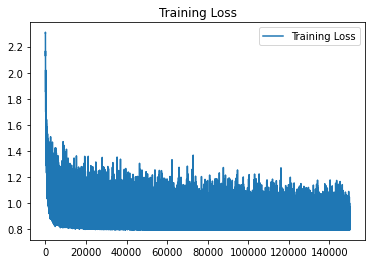

In [12]:
#그래프 확인
plt.plot(loss_value, label='Training Loss')

plt.title('Training Loss')
plt.legend()

Text(0.5, 0, 'Epoch')

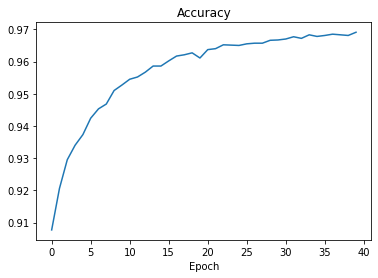

In [13]:
plt.plot(accuracy_value, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')

In [14]:
import os  
os.getcwd()

'/content'